# Payment System Trend Analysis
This notebook analyzes payment systems data, summarizing key insights and trends for each payment channel, including the compound annual growth rate (CAGR) to understand long-term growth and yearly growth rates to identify short-term fluctuations and trends.

Source : Bank of Thailand

Note : The initial files in this Notebook use Power Query for data cleaning to reduce the workload in pre-processing code and export the processed files to work with Python for data analysis.

![alt text](image.png)

In [61]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
tqdm.pandas()

In [62]:
# Read the data from all sheets in the Excel file
all_sheets = pd.read_excel('PaymentData.xlsx', sheet_name=None)

In [63]:
# display all_sheet names
print(all_sheets.keys())

dict_keys(['Vol  of Txn by Payment System', 'Value of Txn by Payment System', 'Vol  of Plastic card usage', 'Value  of Plastic card usage', 'number of cards', 'No of EFTPOS Terminals <2018', 'No of EFTPOS Terminals 2018+', 'Payment Cards on ATM & POS', 'Mobile,internet banking', 'Mobile,internet banking add', 'Bill Payment', 'Vol  of e-payment', 'Value  of e-payment', 'e-Money', 'Foreign cards & emoney', 'Thai cards spent abroad', 'promptpay', 'PaymentTransactions', 'Index'])


## Exploratory Data Analysis

In [64]:
# show example data each sheet names
for sheet_name, data in all_sheets.items():
    print(f"Sheet: {sheet_name}")
    print(data.head())

Sheet: Vol  of Txn by Payment System
  Payment Type      Month  Volume
0    1. Cheque 2010-01-01    8738
1    1. Cheque 2010-02-01    9107
2    1. Cheque 2010-03-01   11257
3    1. Cheque 2010-04-01    9178
4    1. Cheque 2010-05-01    8823
Sheet: Value of Txn by Payment System
  Payment Type      Month  Value
0    1. Cheque 2010-01-01   3882
1    1. Cheque 2010-02-01   3966
2    1. Cheque 2010-03-01   4788
3    1. Cheque 2010-04-01   4168
4    1. Cheque 2010-05-01   3816
Sheet: Vol  of Plastic card usage
                              Plastic Card Type      Month  Volume
0                                    Debit card 2010-04-01   82674
1                                   Credit card 2010-04-01   25116
2                                      ATM card 2010-04-01   37753
3                                         Total 2010-04-01  145544
4  Debit card for purchasing purpose via EFTPOS 2010-04-01    1107
Sheet: Value  of Plastic card usage
                              Plastic Card Type    

In [65]:
# Show example data 'Vol  of Txn by Payment System' sheet
df1 = all_sheets['Vol  of Txn by Payment System']
print(df1.head(5))

  Payment Type      Month  Volume
0    1. Cheque 2010-01-01    8738
1    1. Cheque 2010-02-01    9107
2    1. Cheque 2010-03-01   11257
3    1. Cheque 2010-04-01    9178
4    1. Cheque 2010-05-01    8823


In [66]:
# Display df1 information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Payment Type  1368 non-null   object        
 1   Month         1368 non-null   datetime64[ns]
 2   Volume        1368 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 32.2+ KB


In [67]:
df1.shape

(1368, 3)

In [68]:
df1.columns

Index(['Payment Type', 'Month', 'Volume'], dtype='object')

In [69]:
# Display basic statistics of df1
df1.describe()

,Month,Volume
count,1368,1.368000e+03
mean,2016-04-16 04:44:12.631578880,1.891462e+05
min,2010-01-01 00:00:00,1.580000e+02
25%,2013-02-22 00:00:00,1.377850e+04
50%,2016-04-16 00:00:00,4.511000e+04
75%,2019-06-08 12:00:00,1.735090e+05
max,2022-08-01 00:00:00,2.515601e+06
std,NaN,3.794265e+05


In [70]:
# Check missing values
df1.isnull().sum()

Payment Type    0
Month           0
Volume          0
dtype: int64

In [71]:
# Show example data 'Value of Txn by Payment System' sheet
df2 = all_sheets['Value of Txn by Payment System']
print(df2.head(5))

  Payment Type      Month  Value
0    1. Cheque 2010-01-01   3882
1    1. Cheque 2010-02-01   3966
2    1. Cheque 2010-03-01   4788
3    1. Cheque 2010-04-01   4168
4    1. Cheque 2010-05-01   3816


In [72]:
# Display df2 information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Payment Type  1368 non-null   object        
 1   Month         1368 non-null   datetime64[ns]
 2   Value         1368 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 32.2+ KB


In [73]:
df2.shape

(1368, 3)

In [74]:
df2.columns

Index(['Payment Type', 'Month', 'Value'], dtype='object')

In [75]:
# Display basic statistics of df2
df2.describe()

,Month,Value
count,1368,1368.000000
mean,2016-04-16 04:44:12.631578880,10037.785819
min,2010-01-01 00:00:00,1.000000
25%,2013-02-22 00:00:00,161.000000
50%,2016-04-16 00:00:00,3028.000000
75%,2019-06-08 12:00:00,19970.750000
max,2022-08-01 00:00:00,51554.000000
std,NaN,12803.551233


In [76]:
# Check missing values
df2.isnull().sum()

Payment Type    0
Month           0
Value           0
dtype: int64

In [77]:
# change data type of 'Payment Type' column in df1 and df2 to string
df1['Payment Type'] = df1['Payment Type'].astype(str)
df2['Payment Type'] = df2['Payment Type'].astype(str)


In [78]:
# print data type in each column df1 and df2
print(df1.dtypes)
print(df2.dtypes)


Payment Type            object
Month           datetime64[ns]
Volume                   int64
dtype: object
Payment Type            object
Month           datetime64[ns]
Value                    int64
dtype: object


In [79]:
# check unique values in 'Payment Type' column in df1 and df2
df1['Payment Type'].unique()
df2['Payment Type'].unique()

array(['1. Cheque', '2. e-Payments', '2.1 BAHTNET - 3rd Party',
       '2.2 Bulk Payment',
       '2.3 Interbank Funds Transfer (Online Retail Funds Transfer: ORFT)',
       '2.4 Inhouse Funds Transfer', '2.5 Payment cards',
       '2.6 e-Money 5/', 'Total'], dtype=object)

In [80]:
# Create function to clean the data in column 'Payment Type' both df1 and df2
def clean_payment_type(payment_type):
    payment_type = re.sub(r'^\s*\d+(\.\d+)?\s*', '', payment_type)
    payment_type = payment_type.strip()
    return payment_type

# Apply the function to 'Payment Type' column in df1 and df2
df1['Payment Type'] = df1['Payment Type'].apply(clean_payment_type)
df2['Payment Type'] = df2['Payment Type'].apply(clean_payment_type)


In [81]:
# Show the result in df1 and df2
print(df1['Payment Type'].unique())
print(df2['Payment Type'].unique())


['. Cheque' '. e-Payments' 'BAHTNET - 3rd Party' 'Bulk Payment'
 'Interbank Funds Transfer (Online Retail Funds Transfer: ORFT)'
 'Inhouse Funds Transfer' 'Payment cards' 'e-Money 6/' 'Total']
['. Cheque' '. e-Payments' 'BAHTNET - 3rd Party' 'Bulk Payment'
 'Interbank Funds Transfer (Online Retail Funds Transfer: ORFT)'
 'Inhouse Funds Transfer' 'Payment cards' 'e-Money 5/' 'Total']


In [82]:
# remove . from 'Payment Type' column in df1 and df2
df1['Payment Type'] = df1['Payment Type'].str.replace('.', '')
df2['Payment Type'] = df2['Payment Type'].str.replace('.', '')

# remove space data in 'Payment Type' column in df1 and df2
df1['Payment Type'] = df1['Payment Type'].str.strip()
df2['Payment Type'] = df2['Payment Type'].str.strip()

# for loop remove 5/ and 6/ from 'Payment Type' column in df1 and df2
for i in range(5, 7):
    df1['Payment Type'] = df1['Payment Type'].str.replace(f'{i}/', '')
    df2['Payment Type'] = df2['Payment Type'].str.replace(f'{i}/', '')

In [83]:
# show the result in df1 'Payment Type' column
df1['Payment Type'].unique()


array(['Cheque', 'e-Payments', 'BAHTNET - 3rd Party', 'Bulk Payment',
       'Interbank Funds Transfer (Online Retail Funds Transfer: ORFT)',
       'Inhouse Funds Transfer', 'Payment cards', 'e-Money ', 'Total'],
      dtype=object)

In [84]:
# show the result in df2 'Payment Type' column
df2['Payment Type'].unique()

array(['Cheque', 'e-Payments', 'BAHTNET - 3rd Party', 'Bulk Payment',
       'Interbank Funds Transfer (Online Retail Funds Transfer: ORFT)',
       'Inhouse Funds Transfer', 'Payment cards', 'e-Money ', 'Total'],
      dtype=object)

In [85]:
df1.head(5)

,Payment Type,Month,Volume
0,Cheque,2010-01-01,8738
1,Cheque,2010-02-01,9107
2,Cheque,2010-03-01,11257
3,Cheque,2010-04-01,9178
4,Cheque,2010-05-01,8823


In [86]:
df2.head(5)

,Payment Type,Month,Value
0,Cheque,2010-01-01,3882
1,Cheque,2010-02-01,3966
2,Cheque,2010-03-01,4788
3,Cheque,2010-04-01,4168
4,Cheque,2010-05-01,3816


In [87]:
# Merge df1 and df2 to create a new dataframe called df
df = pd.merge(df1, df2, on=['Payment Type', 'Month'], how='inner')


In [88]:
# Show the result in df
df.head(5)

,Payment Type,Month,Volume,Value
0,Cheque,2010-01-01,8738,3882
1,Cheque,2010-02-01,9107,3966
2,Cheque,2010-03-01,11257,4788
3,Cheque,2010-04-01,9178,4168
4,Cheque,2010-05-01,8823,3816


In [89]:
df.shape

(1368, 4)

In [90]:
# Display basic statistics of df
df.describe()

,Month,Volume,Value
count,1368,1.368000e+03,1368.000000
mean,2016-04-16 04:44:12.631578880,1.891462e+05,10037.785819
min,2010-01-01 00:00:00,1.580000e+02,1.000000
25%,2013-02-22 00:00:00,1.377850e+04,161.000000
50%,2016-04-16 00:00:00,4.511000e+04,3028.000000
75%,2019-06-08 12:00:00,1.735090e+05,19970.750000
max,2022-08-01 00:00:00,2.515601e+06,51554.000000
std,NaN,3.794265e+05,12803.551233


In [91]:
# Check missing values in df
df.isnull().sum()

Payment Type    0
Month           0
Volume          0
Value           0
dtype: int64

In [92]:
# Create new column 'Year' in df
df['Year'] = df['Month'].dt.year

In [93]:
df.head(5)

,Payment Type,Month,Volume,Value,Year
0,Cheque,2010-01-01,8738,3882,2010
1,Cheque,2010-02-01,9107,3966,2010
2,Cheque,2010-03-01,11257,4788,2010
3,Cheque,2010-04-01,9178,4168,2010
4,Cheque,2010-05-01,8823,3816,2010


In [94]:
# save df to excel file
df.to_excel('df.xlsx', index=False)

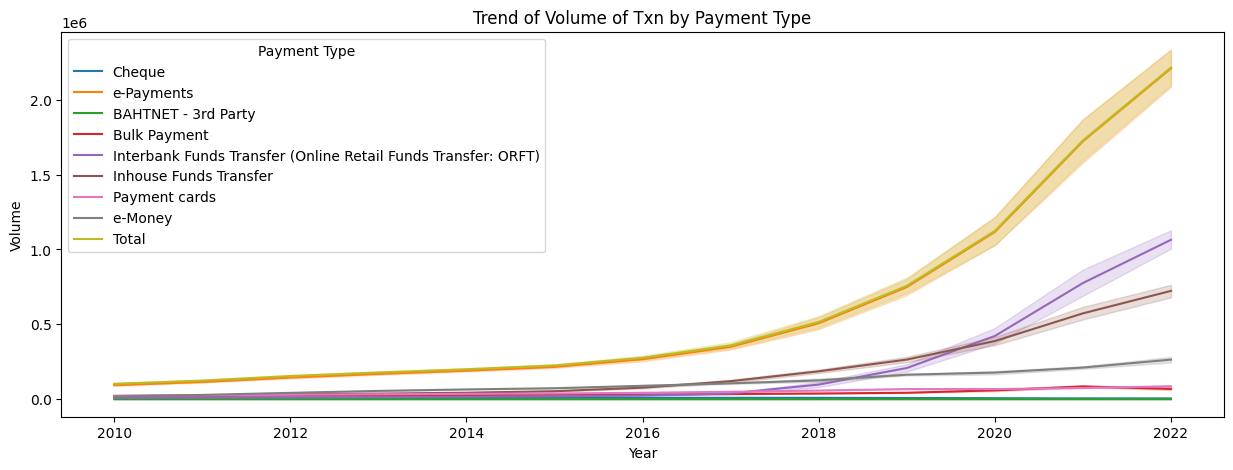

In [95]:
# Trend of 'Volume of Txn' by 'Payment Type'
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='Volume', data=df, hue='Payment Type')
plt.title('Trend of Volume of Txn by Payment Type')
plt.show()


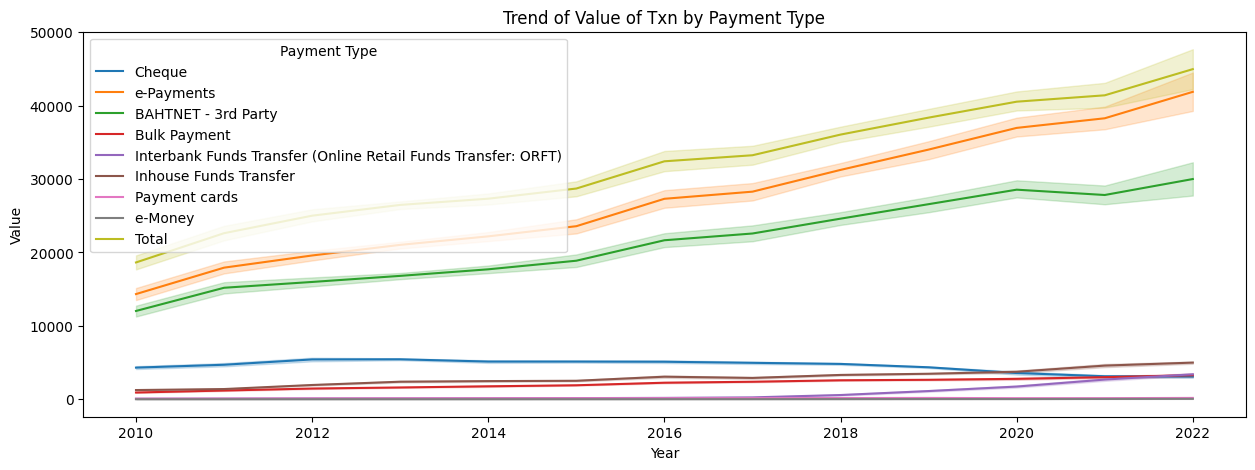

In [96]:
# Trend of 'Value of Txn' by 'Payment Type'
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='Value', data=df, hue='Payment Type')
plt.title('Trend of Value of Txn by Payment Type')
plt.show()

In [97]:
# Show unique values in 'Payment Type' column
df['Payment Type'].unique()

array(['Cheque', 'e-Payments', 'BAHTNET - 3rd Party', 'Bulk Payment',
       'Interbank Funds Transfer (Online Retail Funds Transfer: ORFT)',
       'Inhouse Funds Transfer', 'Payment cards', 'e-Money ', 'Total'],
      dtype=object)

In [ ]:
# Proportion of Payment Types by Volume and Value

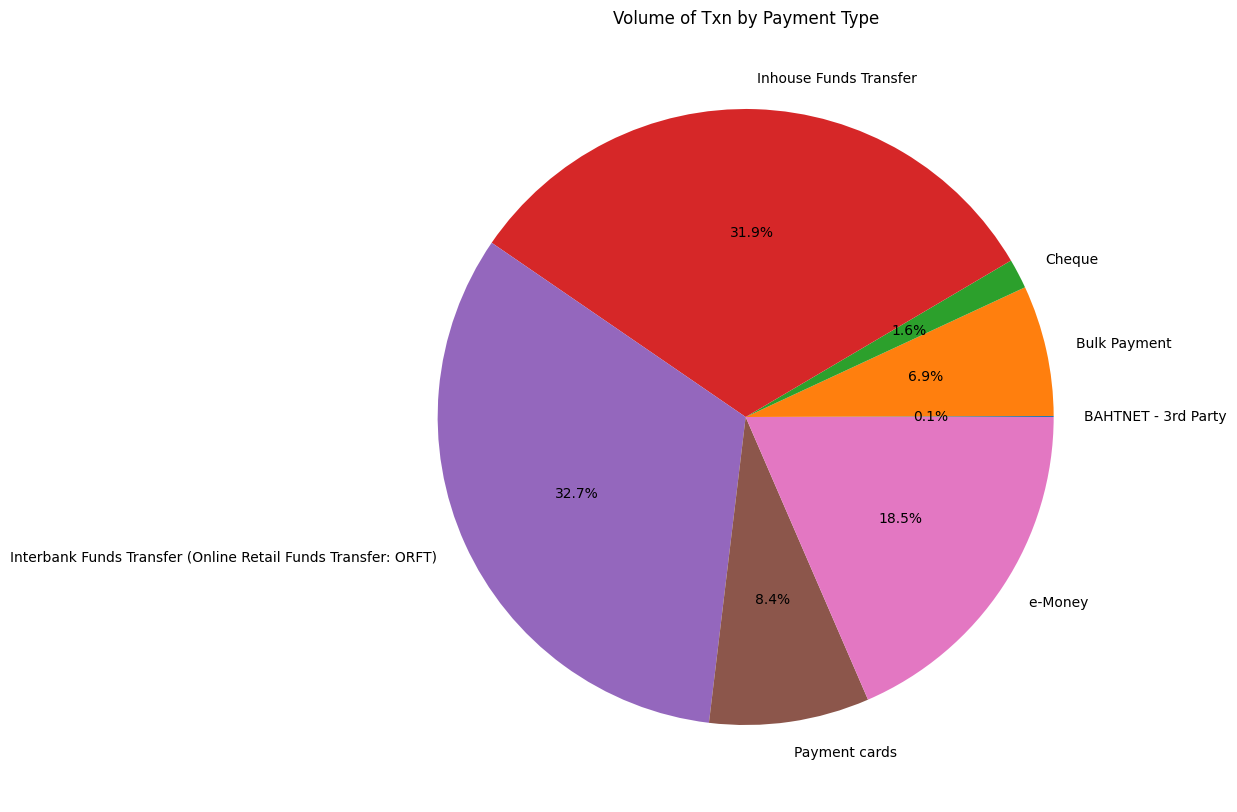

In [98]:
# Filter out 'Total' and 'e-Payments' from 'Payment Type'
df_pie = df[~df['Payment Type'].isin(['Total', 'e-Payments'])]

# Group by 'Payment Type' and sum the 'Volume'
df_pie = df_pie.groupby('Payment Type')['Volume'].sum().reset_index()

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(df_pie['Volume'], labels=df_pie['Payment Type'], autopct='%1.1f%%')
plt.title('Volume of Txn by Payment Type')
plt.show()


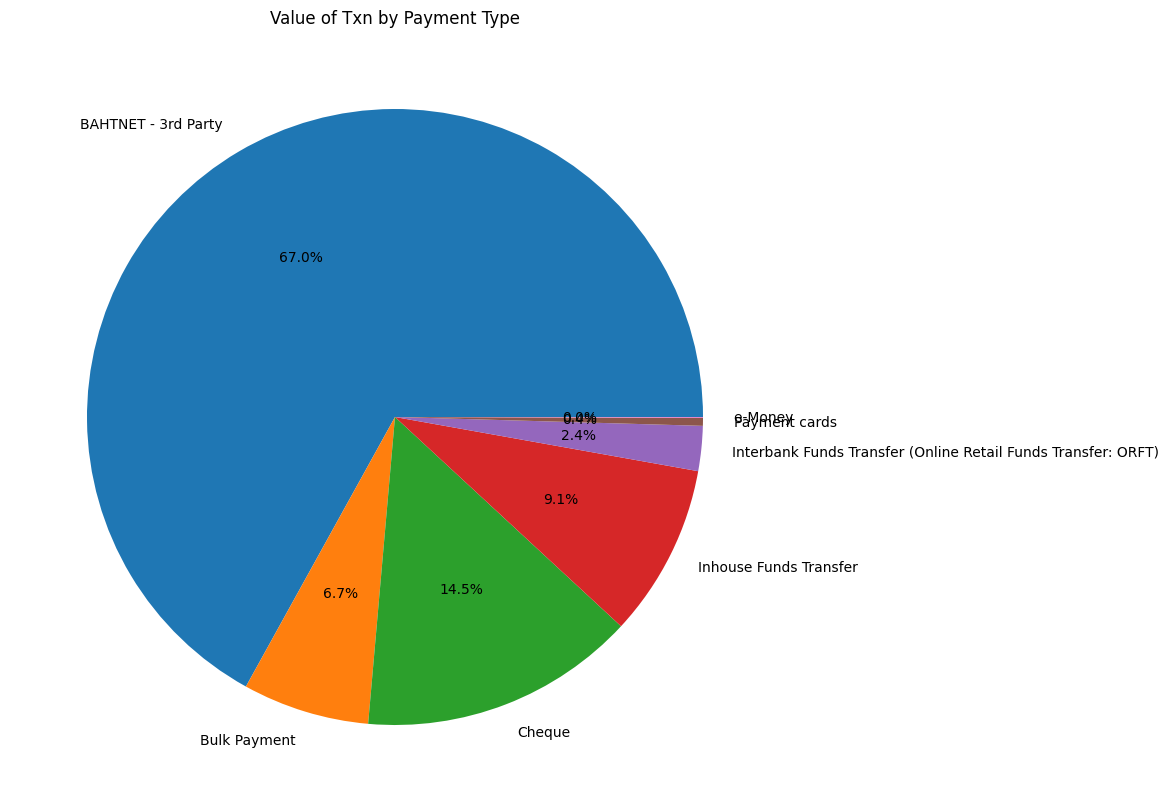

In [102]:
# Filter out 'Total' and 'e-Payments' from 'Payment Type'
df_pie = df[~df['Payment Type'].isin(['Total', 'e-Payments'])]

# Group by 'Payment Type' and calculate the total 'Value'
df_pie = df_pie.groupby('Payment Type')['Value'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(df_pie['Value'], labels=df_pie['Payment Type'], autopct='%1.1f%%')
plt.xticks(fontsize=4)
plt.title('Value of Txn by Payment Type')
plt.show()


## Yearly Growth Rates by Volume and Value

In [104]:
# Calculate the percent change rates for each payment channel in the 'Volume of Txn' from 2010 to 2022
df_growth_vol = df.groupby(['Payment Type', 'Year'])['Volume'].sum().unstack()
df_growth_vol = df_growth_vol.pct_change(axis=1).mul(100).round(2)
df_growth_vol = df_growth_vol.reset_index()

# Show the result in df_growth and sort by name of payment type
df_growth_vol = df_growth_vol.sort_values('Payment Type')
df_growth_vol.head(10)

Year,Payment Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,BAHTNET - 3rd Party,NaN,17.72,8.59,10.81,5.63,6.57,11.08,5.47,5.71,4.65,1.08,1.31,-31.27
1,Bulk Payment,NaN,8.87,12.49,3.89,3.44,5.77,5.59,9.63,10.72,12.81,37.42,43.66,-46.29
2,Cheque,NaN,1.05,6.65,-2.36,-1.45,1.40,-1.41,-4.19,-1.70,-10.80,-17.14,-16.19,-35.89
3,Inhouse Funds Transfer,NaN,17.77,26.28,15.20,15.85,23.31,44.12,55.57,54.77,42.03,46.72,47.61,-15.88
4,Interbank Funds Transfer (Online Retail Funds ...,NaN,16.44,20.51,15.60,14.79,18.03,26.88,54.90,153.72,112.95,102.51,83.71,-8.53
5,Payment cards,NaN,15.55,16.38,9.86,8.06,7.06,11.73,15.74,16.21,17.17,0.11,10.47,-22.96
6,Total,NaN,20.82,24.42,15.35,12.01,12.70,22.65,29.77,43.63,46.63,48.41,53.75,-14.55
7,e-Money,NaN,57.23,47.06,30.68,17.74,12.11,21.84,18.20,18.77,30.10,8.67,18.79,-16.57
8,e-Payments,NaN,22.84,25.91,16.61,12.81,13.28,23.77,31.03,44.86,47.68,49.14,54.18,-14.48


In [105]:
# save df_growth_vol to excel file
df_growth_vol.to_excel('df_growth_vol.xlsx', index=False)

In [106]:
# Calculate the percent change rates for each payment channel in the 'Value of Txn' from 2010 to 2022 
df_growth_val = df.groupby(['Payment Type', 'Year'])['Value'].sum().unstack()
df_growth_val = df_growth_val.pct_change(axis=1).mul(100).round(2)
df_growth_val = df_growth_val.reset_index()

# Show the result in df_growth and sort by name of payment type
df_growth_val = df_growth_val.sort_values('Payment Type')
df_growth_val.head(10)

Year,Payment Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,BAHTNET - 3rd Party,NaN,26.29,5.21,5.19,5.31,6.62,14.77,4.25,8.95,8.02,7.43,-2.54,-28.12
1,Bulk Payment,NaN,29.57,23.00,9.95,9.85,8.00,18.32,5.90,8.34,2.62,4.83,8.30,-27.55
2,Cheque,NaN,9.02,15.46,0.39,-5.71,-0.02,-0.46,-2.89,-3.01,-9.51,-17.98,-12.35,-34.14
3,Inhouse Funds Transfer,NaN,10.92,39.84,23.12,3.42,1.79,22.15,-5.43,14.02,4.84,7.80,22.42,-27.38
4,Interbank Funds Transfer (Online Retail Funds ...,NaN,22.17,23.27,12.00,13.50,14.60,20.04,38.79,126.53,94.88,54.64,55.14,-15.45
5,Payment cards,NaN,21.86,27.11,10.62,8.06,6.04,7.23,7.64,6.87,10.74,-18.03,1.03,-19.74
6,Total,NaN,21.39,10.54,5.87,3.20,5.06,12.92,2.54,8.47,6.41,5.66,2.14,-27.59
7,e-Money,NaN,50.00,50.00,38.89,14.00,19.30,35.29,38.04,61.42,37.56,9.93,50.97,-14.10
8,e-Payments,NaN,25.11,9.26,7.39,5.51,6.24,15.84,3.56,10.48,8.86,8.68,3.54,-27.06


In [107]:
# save df_growth_val to excel file
df_growth_val.to_excel('df_growth_val.xlsx', index=False)

NOTE : In 2021, ORFT (Online Retail Funds Transfer) transactions showed the highest growth rate both in Volume (83.71%) and Value. This was followed by Inhouse Fund Transfer and Bulk Payment (in terms of volume). For e-Money channels, it was found to have the second-highest payment value in terms of Volume.

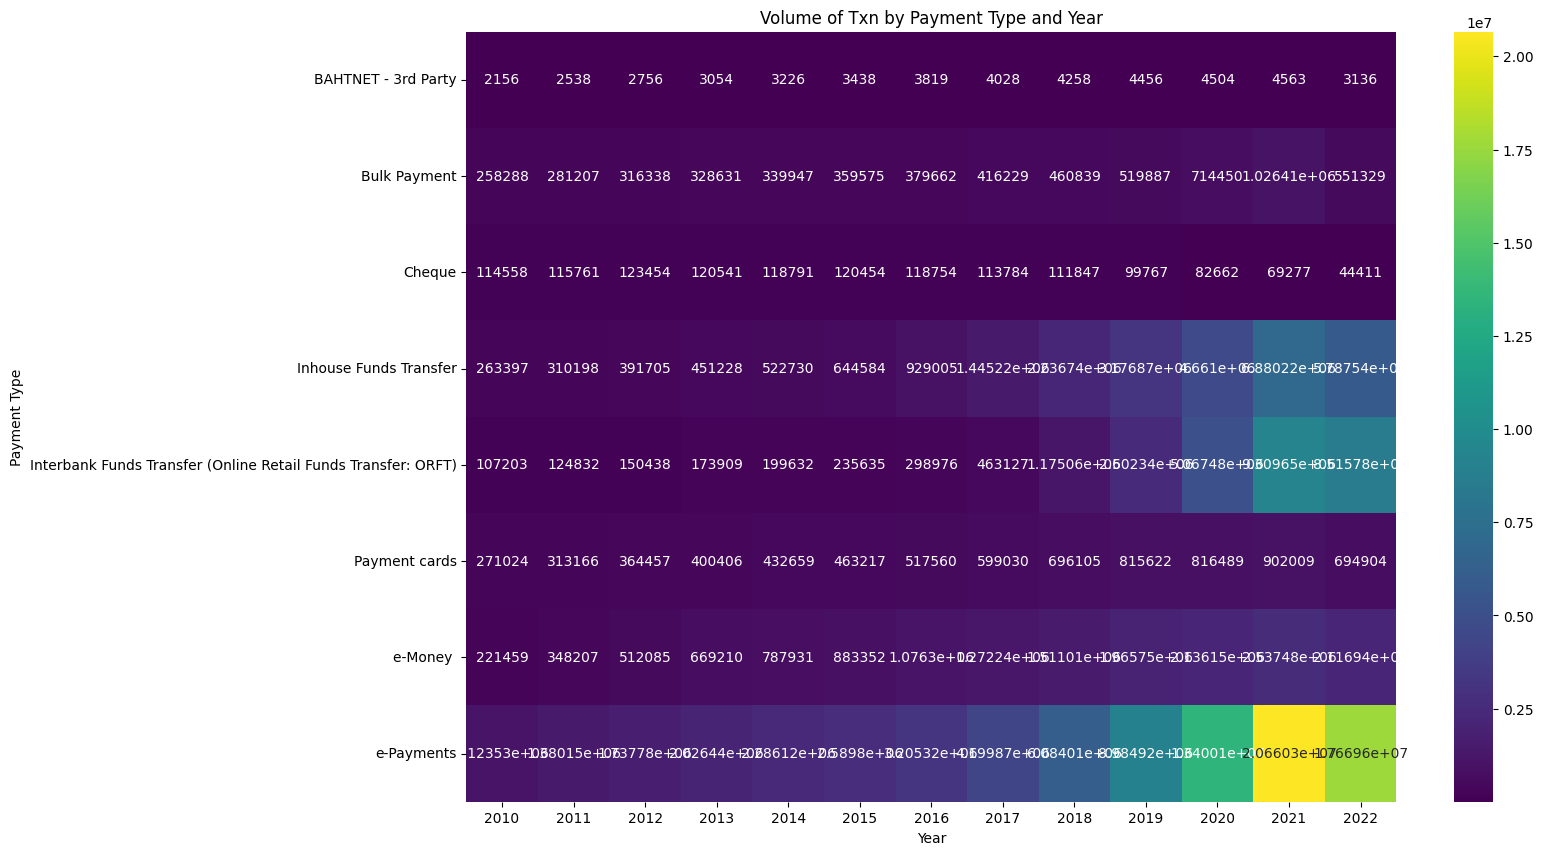

In [41]:
# Display 'Volume of Txn' by Payment Type and Year by Heatmap except 'Total'
plt.figure(figsize=(15, 10))
df_heatmap = df[df['Payment Type'] != 'Total']
df_heatmap = df_heatmap.groupby(['Payment Type', 'Year'])['Volume'].sum().unstack()
sns.heatmap(df_heatmap, annot=True, fmt='g', cmap='viridis')
plt.title('Volume of Txn by Payment Type and Year')
plt.show()


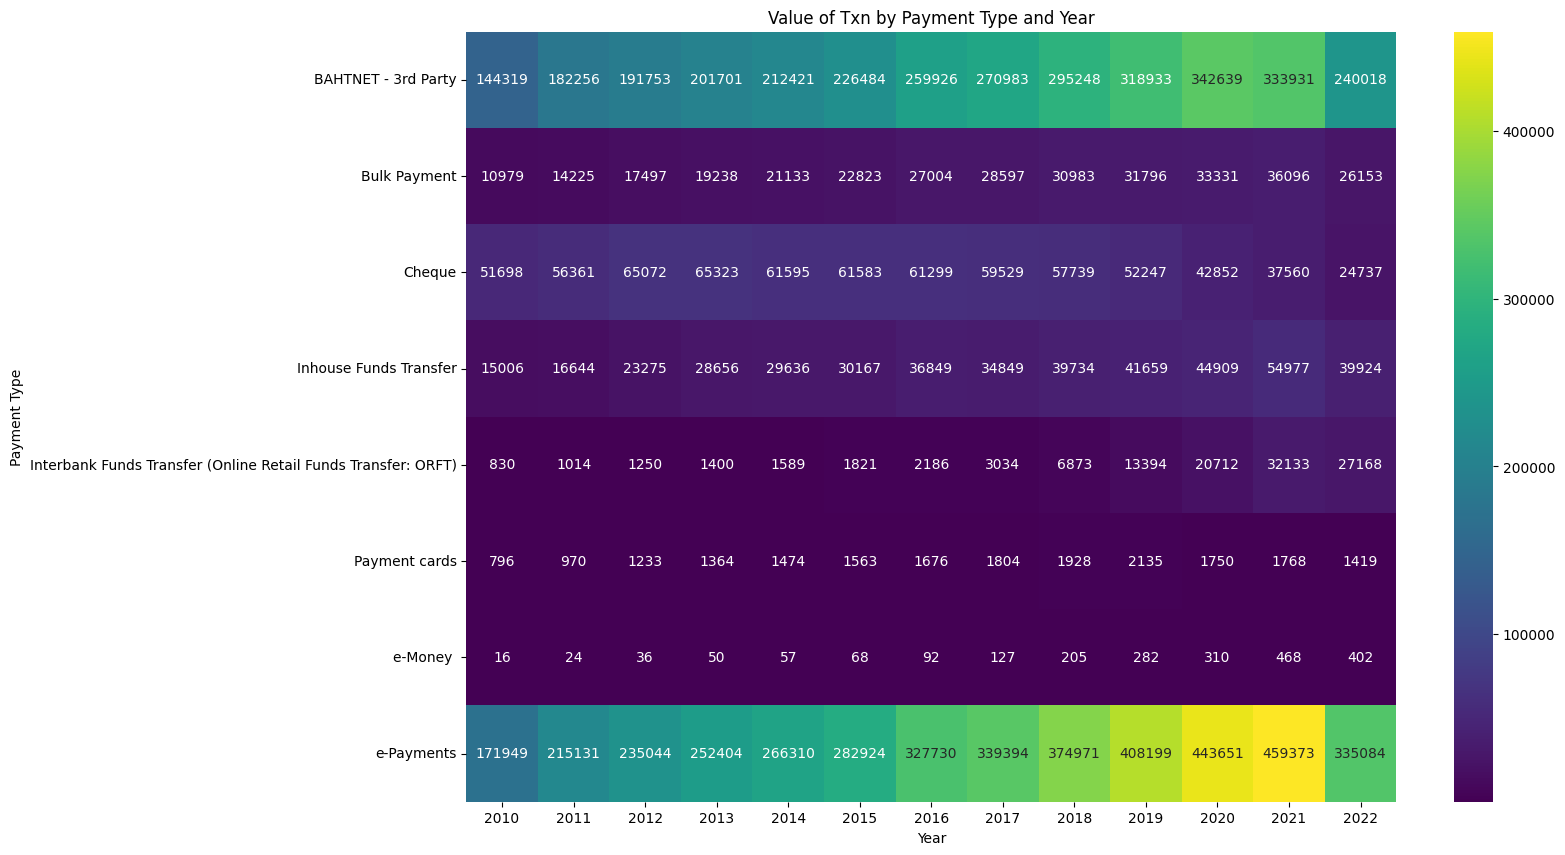

In [42]:
# Display Value of Txn by Payment Type and Year by Heatmap except 'Total'
plt.figure(figsize=(15, 10))
df_heatmap = df[df['Payment Type'] != 'Total']
df_heatmap = df_heatmap.groupby(['Payment Type', 'Year'])['Value'].sum().unstack()
sns.heatmap(df_heatmap, annot=True, fmt='g', cmap='viridis')
plt.title('Value of Txn by Payment Type and Year')
plt.show()

# Key Takeaway

### 1. Volume of Transactions by Payment System
- **Cheque**: The volume of cheque transactions has been declining over the years, reflecting a shift towards electronic payments.
- **e-Payments**: Significant growth in e-payment transactions, indicating increased adoption of digital payment methods.
- **ATM**: Steady usage with slight fluctuations, showing continued reliance on cash withdrawals.
- **Internet/Mobile Banking**: Rapid growth, especially in recent years, highlighting the shift towards online and mobile banking.

### 2. Value of Transactions by Payment System

- **Cheque**: Similar to the volume, the value of cheque transactions is decreasing.
- **e-Payments**: The value of e-payment transactions has seen substantial growth, aligning with the increase in volume.
- **ATM**: Consistent value of transactions, reflecting stable cash withdrawal patterns.
- **Internet/Mobile Banking**: Significant increase in transaction value, indicating higher usage and trust in online banking platforms.

## Compound Annual Growth Rate (CAGR) by Volume and Value

In [54]:
# Create new dataframe for calculate compound annual growth rate (CAGR)
df_cagr = df.copy()


In [55]:
df_cagr.head(5)

,Payment Type,Month,Volume,Value,Year
0,Cheque,2010-01-01,8738,3882,2010
1,Cheque,2010-02-01,9107,3966,2010
2,Cheque,2010-03-01,11257,4788,2010
3,Cheque,2010-04-01,9178,4168,2010
4,Cheque,2010-05-01,8823,3816,2010


In [56]:
# Group by 'Payment Type' and 'Year' and aggregate sum of 'Volume' 
df3 = df_cagr.groupby(['Payment Type', 'Year'], as_index=False)['Volume'].sum()

# Pivot the aggregated DataFrame
df_pivot = df3.pivot(index='Payment Type', columns='Year', values='Volume').reset_index()


In [57]:
# Pivot Table creation
df_pivot = df3.pivot(index='Payment Type', columns='Year', values='Volume')

# Define 'start_year' exists in columns
start_year = 2010
if start_year not in df_pivot.columns:
    raise ValueError(f"Start year {start_year} is missing from the data.")

# CAGR Calculation Function
def calculate_cagr_row(row, start_year=2010):
    cagr_dict = {}
    # Ensure start value is valid
    if pd.notna(row[start_year]):
        start_value = row[start_year]
        for year in range(start_year + 1, 2023):  # Calculate from 2011 to 2022
            if year in row.index and pd.notna(row[year]):
                end_value = row[year]
                years = year - start_year
                cagr = ((end_value / start_value) ** (1 / years)) - 1
                cagr_dict[f'CAGR_{year}'] = round(cagr * 100, 2)  # Convert to percentage
            else:
                cagr_dict[f'CAGR_{year}'] = None  # No data case
    else:
        # Start year value is missing or NaN
        for year in range(start_year + 1, 2023):
            cagr_dict[f'CAGR_{year}'] = None
    return pd.Series(cagr_dict)

# Apply the function across rows
cagr_df = df_pivot.apply(calculate_cagr_row, axis=1).reset_index()

# Display result
print(cagr_df)

                                        Payment Type  CAGR_2011  CAGR_2012  \
0                                BAHTNET - 3rd Party      17.72      13.06   
1                                       Bulk Payment       8.87      10.67   
2                                             Cheque       1.05       3.81   
3                             Inhouse Funds Transfer      17.77      21.95   
4  Interbank Funds Transfer (Online Retail Funds ...      16.44      18.46   
5                                      Payment cards      15.55      15.96   
6                                              Total      20.82      22.61   
7                                           e-Money       57.23      52.06   
8                                         e-Payments      22.84      24.37   

   CAGR_2013  CAGR_2014  CAGR_2015  CAGR_2016  CAGR_2017  CAGR_2018  \
0      12.31      10.60       9.78      10.00       9.34       8.88   
1       8.36       7.11       6.84       6.63       7.05       7.51   
2     

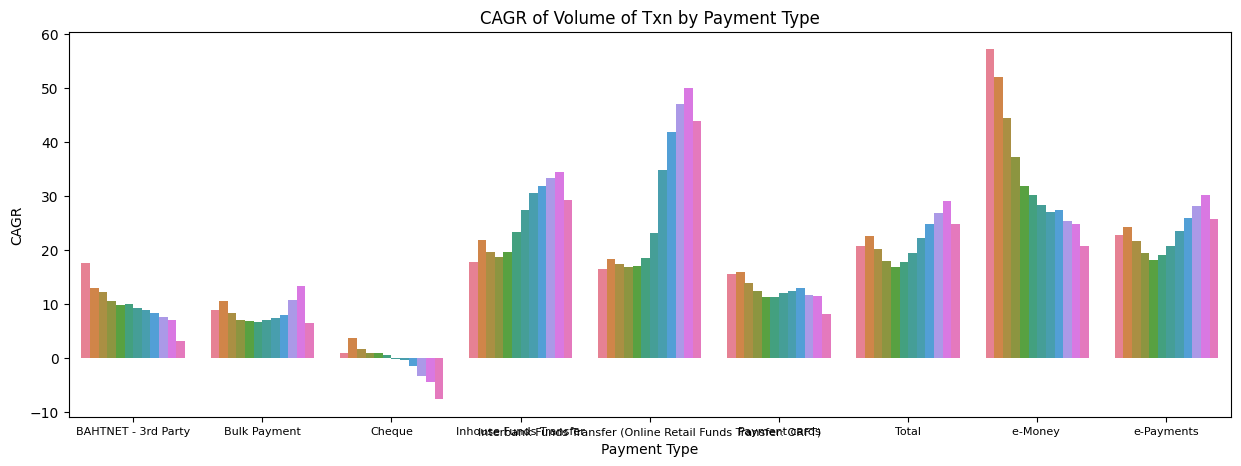

In [58]:
# Plot the CAGR for each payment type
plt.figure(figsize=(15, 5))
cagr_df = cagr_df.melt(id_vars='Payment Type', var_name='Year', value_name='CAGR')
sns.barplot(x='Payment Type', y='CAGR', hue='Year', data=cagr_df)
plt.title('CAGR of Volume of Txn by Payment Type')
plt.xticks(fontsize=8)
plt.legend()
plt.legend().remove()
plt.show()

In [59]:
cagr_df.head(5)

,Payment Type,Year,CAGR
0,BAHTNET - 3rd Party,CAGR_2011,17.72
1,Bulk Payment,CAGR_2011,8.87
2,Cheque,CAGR_2011,1.05
3,Inhouse Funds Transfer,CAGR_2011,17.77
4,Interbank Funds Transfer (Online Retail Funds ...,CAGR_2011,16.44


In [60]:
# save cagr_df to excel file name 'cagr_df.xlsx'
cagr_df.to_excel('cagr_df.xlsx', index=False)


### Note : 

**1. Cheque**
Trend: The CAGR for cheque transactions is relatively low, indicating a decline in usage as digital payment methods become more popular.

**2. Bulk Payment**
Trend: Bulk Payment transactions have shown moderate growth, reflecting steady adoption by businesses for large-scale payments.

**3. BAHTNET - 3rd Party**
Trend: The CAGR for BAHTNET - 3rd Party transactions shows a positive growth trend over the years, indicating increasing usage.

**4. Inhouse Funds Transfer**
Trend: Inhouse Funds Transfer has shown significant growth, suggesting that businesses are increasingly using internal transfer systems.

**5. Interbank Funds Transfer (Online Retail Funds Transfer: ORFT)**
Trend: ORFT transactions have experienced strong growth, reflecting the increasing preference for online retail funds transfers.

**6. Payment Cards**
Trend: Payment card transactions have shown consistent growth, indicating widespread acceptance and usage.

**7. e-Money**
Trend: e-Money transactions have seen substantial growth, driven by the convenience and popularity of digital wallets.

**Conclusion**
Trend: e-Payments have shown strong growth, highlighting the shift towards electronic payment methods.

### Recommendations for Business
- ***Promote Digital Payments*** : Encourage the adoption of digital payment methods by offering incentives and highlighting their benefits such as special discounts and tiered discounts

- ***Improve User Experience*** : Focus on making payment systems more user-friendly and accessible.

- ***Expand Partnerships*** : Collaborate with more merchants and service providers to increase the acceptance of various payment methods.


# Explore Plastic Card Usage

In [438]:
# print all_sheets file names
print(all_sheets.keys())

dict_keys(['Vol  of Txn by Payment System', 'Value of Txn by Payment System', 'Vol  of Plastic card usage', 'Value  of Plastic card usage', 'number of cards', 'No of EFTPOS Terminals <2018', 'No of EFTPOS Terminals 2018+', 'Payment Cards on ATM & POS', 'Mobile,internet banking', 'Mobile,internet banking add', 'Bill Payment', 'Vol  of e-payment', 'Value  of e-payment', 'e-Money', 'Foreign cards & emoney', 'Thai cards spent abroad', 'promptpay', 'PaymentTransactions', 'Index'])


In [442]:
# read data from 'Vol  of Plastic card usage sheet
df_vol_plastic = all_sheets['Vol  of Plastic card usage']
df_vol_plastic.head(5)

,Plastic Card Type,Month,Volume
0,Debit card,2010-04-01,82674
1,Credit card,2010-04-01,25116
2,ATM card,2010-04-01,37753
3,Total,2010-04-01,145544
4,Debit card for purchasing purpose via EFTPOS,2010-04-01,1107


In [443]:
# Show unique values in 'Plastic Card Type column of df_vol_plastic
df_vol_plastic['Plastic Card Type'].unique()

array(['Debit card', 'Credit card', 'ATM card', 'Total',
       'Debit card for purchasing purpose via EFTPOS'], dtype=object)

In [444]:
# filter out 'Debit card for purchasing purpose via EFTPOS' from 'Plastic Card Type' column
df_vol_plastic = df_vol_plastic[df_vol_plastic['Plastic Card Type'] != 'Debit card for purchasing purpose via EFTPOS']

# show data in df_vol_plastic
df_vol_plastic.head(5)

,Plastic Card Type,Month,Volume
0,Debit card,2010-04-01,82674
1,Credit card,2010-04-01,25116
2,ATM card,2010-04-01,37753
3,Total,2010-04-01,145544
6,Credit card,2011-04-01,27566


In [446]:
# read data from 'Value  of Plastic card usage' sheet
df_val_plastic = all_sheets['Value  of Plastic card usage']
df_val_plastic.head(5)

,Plastic Card Type,Month,Value
0,Debit card for purchasing purpose via EFTPOS,2021-09-01,14
1,Debit card,2021-09-01,502
2,ATM card,2021-09-01,36
3,Total,2021-09-01,691
4,Credit card,2021-09-01,153


In [447]:
# Show unique values in 'Plastic Card Type' column of df_val_plastic
df_val_plastic['Plastic Card Type'].unique()

array(['Debit card for purchasing purpose via EFTPOS', 'Debit card',
       'ATM card', 'Total', 'Credit card'], dtype=object)

In [448]:
# filter out 'Debit card for purchasing purpose via EFTPOS' from 'Plastic Card Type' column
df_val_plastic = df_val_plastic[df_val_plastic['Plastic Card Type'] != 'Debit card for purchasing purpose via EFTPOS']

# show data in df_vol_plastic
df_val_plastic.head(5)

,Plastic Card Type,Month,Value
1,Debit card,2021-09-01,502
2,ATM card,2021-09-01,36
3,Total,2021-09-01,691
4,Credit card,2021-09-01,153
5,Debit card,2020-09-01,627


In [449]:
# Merge df_vol_plastic and df_val_plastic to create a new dataframe called df_plastic
df_plastic = pd.merge(df_vol_plastic, df_val_plastic, on=['Plastic Card Type', 'Month'], how='inner')

# show data in df_plastic
df_plastic.head(5)

,Plastic Card Type,Month,Volume,Value
0,Debit card,2010-04-01,82674,486
1,Credit card,2010-04-01,25116,81
2,ATM card,2010-04-01,37753,182
3,Total,2010-04-01,145544,748
4,Credit card,2011-04-01,27566,91


In [450]:
# add new column 'Year' in df_plastic
df_plastic['Year'] = df_plastic['Month'].dt.year
df_plastic.head(5)

,Plastic Card Type,Month,Volume,Value,Year
0,Debit card,2010-04-01,82674,486,2010
1,Credit card,2010-04-01,25116,81,2010
2,ATM card,2010-04-01,37753,182,2010
3,Total,2010-04-01,145544,748,2010
4,Credit card,2011-04-01,27566,91,2011


In [452]:
df_plastic.shape

(608, 5)

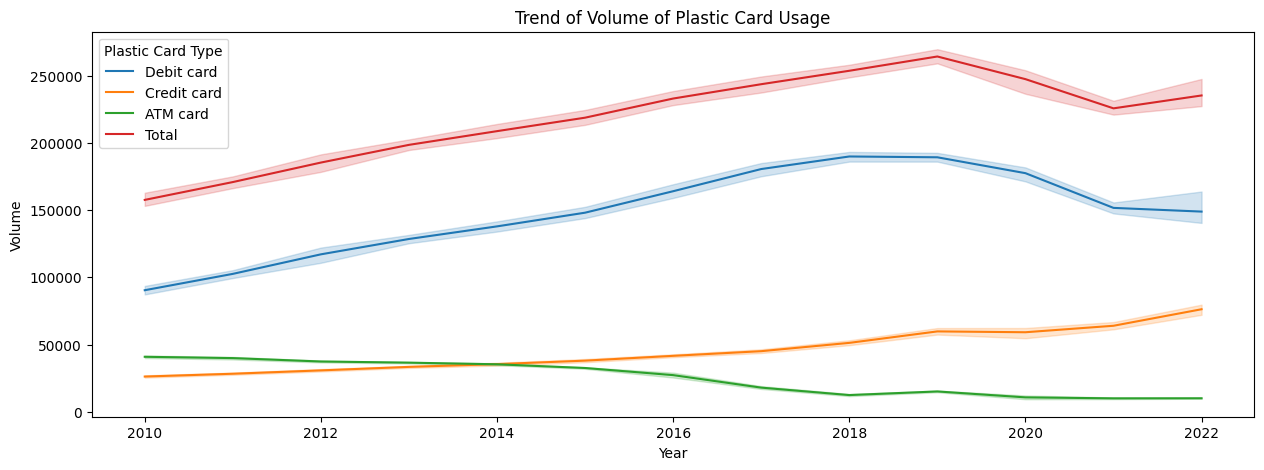

In [453]:
# Trend of 'Volume of Plastic Card Usage' by 'Plastic Card Type'
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='Volume', data=df_plastic, hue='Plastic Card Type')
plt.title('Trend of Volume of Plastic Card Usage')
plt.show()

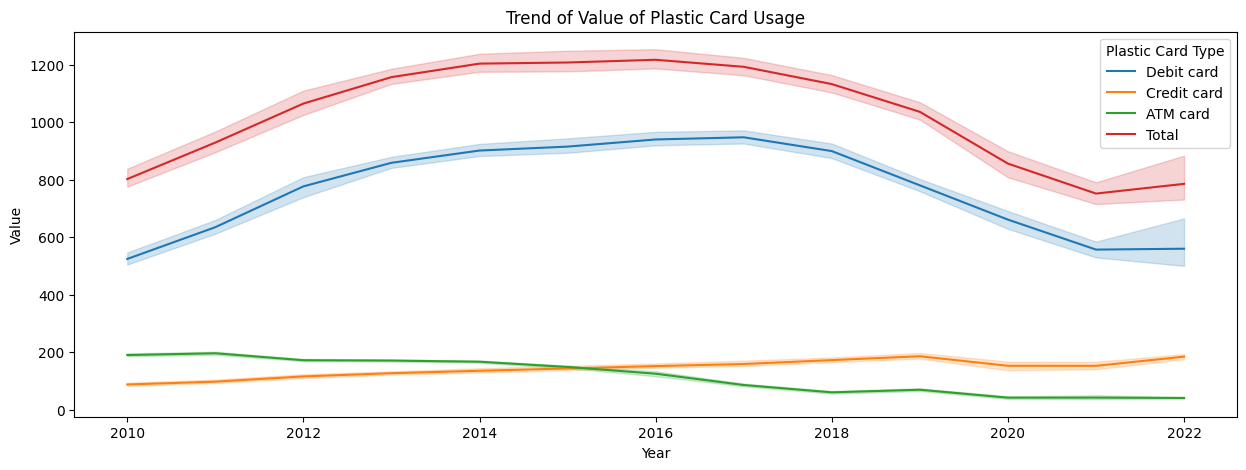

In [454]:
# Trend of 'Value of Plastic Card Usage' by 'Plastic Card Type'
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='Value', data=df_plastic, hue='Plastic Card Type')
plt.title('Trend of Value of Plastic Card Usage')
plt.show()

In [455]:
# save the data in df_plastic to excel file called 'PlasticCardData.xlsx'
df_plastic.to_excel('PlasticCardData.xlsx', index=False)


In [456]:
# Calculate the Volume percent change rates for Plastic Card Type in df_plastic from 2010 to 2022
df_plastic_growth = df_plastic.groupby(['Plastic Card Type', 'Year'])['Volume'].sum().unstack()
df_plastic_growth = df_plastic_growth.pct_change(axis=1).mul(100).round(2)
df_plastic_growth = df_plastic_growth.reset_index()

# Show the result in df_plastic_growth and sort by name of Plastic Card Type
df_plastic_growth = df_plastic_growth.sort_values('Plastic Card Type')
df_plastic_growth.head(10)

Year,Plastic Card Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ATM card,NaN,-2.38,-6.33,-2.29,-3.35,-7.78,-16.29,-34.05,-30.77,21.66,-29.09,-6.74,-32.95
1,Credit card,NaN,7.94,8.84,8.43,6.15,7.27,9.41,8.31,13.70,16.63,-1.05,8.14,-20.54
2,Debit card,NaN,13.44,14.16,9.75,7.29,7.39,10.78,10.05,5.18,-0.32,-6.24,-14.55,-34.55
3,Total,NaN,8.41,8.49,7.10,5.14,4.80,6.51,4.58,4.10,4.19,-6.37,-8.78,-30.50


In [457]:
# Calculate the Value percent change rates for Plastic Card Type in df_plastic from 2010 to 2022
df_plastic_growth = df_plastic.groupby(['Plastic Card Type', 'Year'])['Value'].sum().unstack()
df_plastic_growth = df_plastic_growth.pct_change(axis=1).mul(100).round(2)
df_plastic_growth = df_plastic_growth.reset_index()

# Show the result in df_plastic_growth and sort by name of Plastic Card Type
df_plastic_growth = df_plastic_growth.sort_values('Plastic Card Type')
df_plastic_growth.head(10)


Year,Plastic Card Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ATM card,NaN,3.24,-12.30,-0.68,-2.39,-10.88,-15.79,-31.38,-29.65,15.01,-39.64,0.40,-35.18
1,Credit card,NaN,11.20,18.69,9.63,6.69,5.90,5.75,4.77,8.54,7.77,-17.82,-0.11,-19.42
2,Debit card,NaN,21.07,22.36,10.55,4.97,1.52,2.71,0.81,-5.06,-13.24,-15.28,-15.76,-32.97
3,Total,NaN,15.82,14.60,8.64,4.06,0.33,0.78,-2.01,-5.04,-8.53,-17.37,-12.18,-30.34


# Key Takeaway

### 1. Volume of Usage of Plastic Cards
- **ATM**: Steady usage with slight fluctuations, showing continued reliance on cash withdrawals.
- **Internet/Mobile Banking**: Rapid growth, especially in recent years, highlighting the shift towards online and mobile banking.

### 2. Value of Usage of Plastic Cards
- **ATM**: Consistent value of transactions, reflecting stable cash withdrawal patterns.
- **Internet/Mobile Banking**: Significant increase in transaction value, indicating higher usage and trust in online banking platforms.

In [481]:
# Create new dataframe for calculate compound annual growth rate (CAGR)
df_cagr_plastic = df_plastic.copy()

In [482]:
df_cagr_plastic.head(5)

,Plastic Card Type,Month,Volume,Value,Year
0,Debit card,2010-04-01,82674,486,2010
1,Credit card,2010-04-01,25116,81,2010
2,ATM card,2010-04-01,37753,182,2010
3,Total,2010-04-01,145544,748,2010
4,Credit card,2011-04-01,27566,91,2011


In [483]:
# Group by 'Plastic Card Type' and 'Year' and aggregate sum of 'Volume'
df4 = df_cagr_plastic.groupby(['Plastic Card Type', 'Year'], as_index=False)['Volume'].sum()

# Pivot the aggregated DataFrame
df_pivot_plastic = df4.pivot(index='Plastic Card Type', columns='Year', values='Volume').reset_index()

In [484]:
# Pivot Table creation
df_pivot_plastic = df4.pivot(index='Plastic Card Type', columns='Year', values='Volume')

# Define 'start_year' exists in columns
start_year = 2010
if start_year not in df_pivot_plastic.columns:
    raise ValueError(f"Start year {start_year} is missing from the data.")

# CAGR Calculation Function
def calculate_cagr_row(row, start_year=2010):
    cagr_dict = {}
    # Ensure start value is valid
    if pd.notna(row[start_year]):
        start_value = row[start_year]
        for year in range(start_year + 1, 2023):  # Calculate from 2011 to 2022
            if year in row.index and pd.notna(row[year]):
                end_value = row[year]
                years = year - start_year
                cagr = ((end_value / start_value) ** (1 / years)) - 1
                cagr_dict[f'CAGR_{year}'] = round(cagr * 100, 2)  # Convert to percentage
            else:
                cagr_dict[f'CAGR_{year}'] = None  # No data case
    else:
        # Start year value is missing or NaN
        for year in range(start_year + 1, 2023):
            cagr_dict[f'CAGR_{year}'] = None
    return pd.Series(cagr_dict)

# Apply the function across rows
cagr_df_plastic = df_pivot_plastic.apply(calculate_cagr_row, axis=1).reset_index()

# Display result
print(cagr_df_plastic)



  Plastic Card Type  CAGR_2011  CAGR_2012  CAGR_2013  CAGR_2014  CAGR_2015  \
0          ATM card      -2.38      -4.38      -3.69      -3.60      -4.45   
1       Credit card       7.94       8.39       8.40       7.84       7.72   
2        Debit card      13.44      13.80      12.43      11.13      10.37   
3             Total       8.41       8.45       8.00       7.28       6.78   

   CAGR_2016  CAGR_2017  CAGR_2018  CAGR_2019  CAGR_2020  CAGR_2021  CAGR_2022  
0      -6.54     -11.08     -13.82     -10.45     -12.52     -12.01     -13.98  
1       8.00       8.05       8.74       9.59       8.47       8.44       5.67  
2      10.44      10.38       9.72       8.55       6.97       4.81       0.78  
3       6.73       6.42       6.13       5.91       4.61       3.32      -0.04  


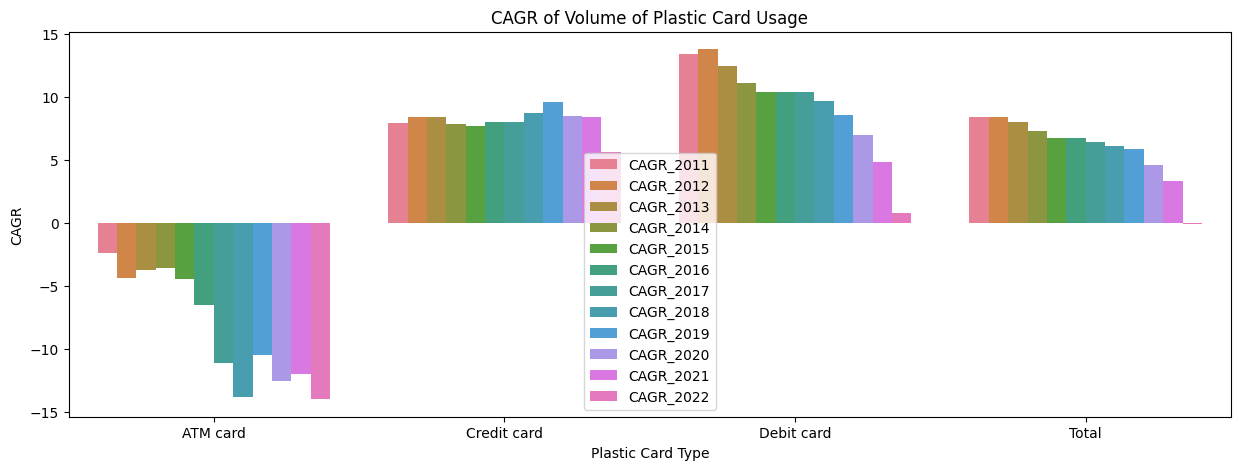

In [485]:
# Plot the CAGR for each Plastic Card Type
plt.figure(figsize=(15, 5))
cagr_df_plastic = cagr_df_plastic.melt(id_vars='Plastic Card Type', var_name='Year', value_name='CAGR')
sns.barplot(x='Plastic Card Type', y='CAGR', hue='Year', data=cagr_df_plastic)
plt.title('CAGR of Volume of Plastic Card Usage')
plt.legend(loc='lower center')
plt.show()


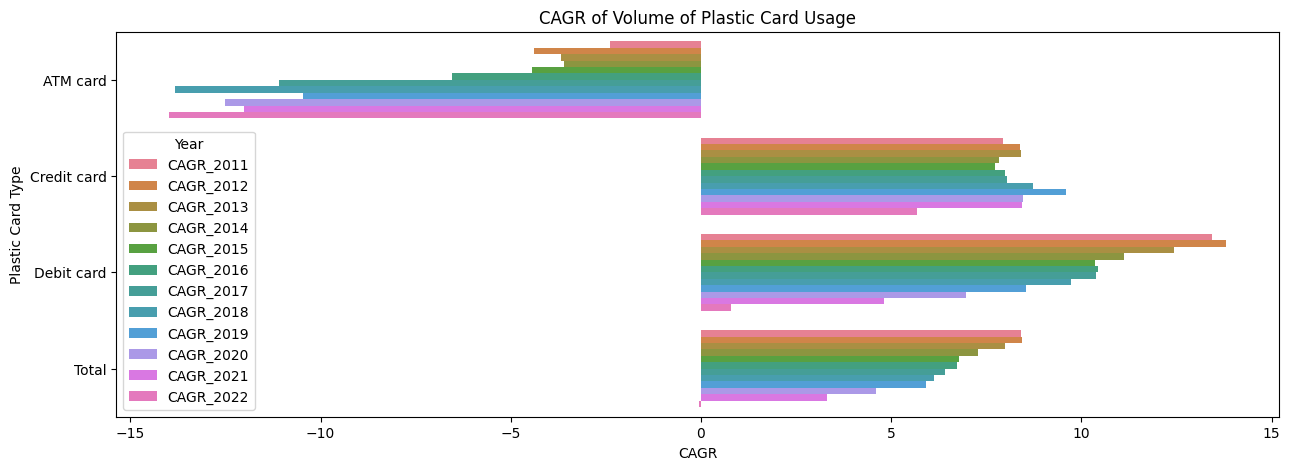

In [466]:
# convert data label x-axis and y-axis
plt.figure(figsize=(15, 5))
sns.barplot(x='CAGR', y='Plastic Card Type', hue='Year', data=cagr_df_plastic)
plt.title('CAGR of Volume of Plastic Card Usage')
plt.show()

In [490]:
cagr_df_plastic.head(5)

,Plastic Card Type,Year,CAGR
0,ATM card,CAGR_2011,-2.38
1,Credit card,CAGR_2011,7.94
2,Debit card,CAGR_2011,13.44
3,Total,CAGR_2011,8.41
4,ATM card,CAGR_2012,-4.38


In [491]:
# save the data in cagr_df_plastic to excel file called 'CAGRPlasticCardData.xlsx'
cagr_df_plastic.to_excel('CAGRPlasticCardData.xlsx', index=False)

In [498]:
# Create new dataframe for predict calculate compound annual growth rate (CAGR)
df_cagr_p = cagr_df_plastic.copy()

In [499]:
df_cagr_p.head(5)

,Plastic Card Type,Year,CAGR
0,ATM card,CAGR_2011,-2.38
1,Credit card,CAGR_2011,7.94
2,Debit card,CAGR_2011,13.44
3,Total,CAGR_2011,8.41
4,ATM card,CAGR_2012,-4.38


In [500]:
# Extract CAGR_2011 in column 'Year' to be 2011 from df_cagr_p dataframe
df_cagr_p['Year'] = df_cagr_p['Year'].str.extract(r'(\d+)').astype(int)

# Drop missing values in df_cagr_p
df_cagr_p = df_cagr_p.dropna()

# Display data in df_cagr_p
df_cagr_p.head(5)

,Plastic Card Type,Year,CAGR
0,ATM card,2011,-2.38
1,Credit card,2011,7.94
2,Debit card,2011,13.44
3,Total,2011,8.41
4,ATM card,2012,-4.38


In [501]:
df_cagr_p.dtypes

Plastic Card Type     object
Year                   int32
CAGR                 float64
dtype: object

# Assumption : Plastic Card will perform as expected over the next 3 years

In [502]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cagr_p has 'Year' and 'CAGR' columns calculated from 2011 to 2022

# Create X and y for Linear Regression Model
X = df_cagr_p[df_cagr_p['Year'] <= 2022]['Year'].values.reshape(-1, 1)
y = df_cagr_p[df_cagr_p['Year'] <= 2022]['CAGR'].values  # Assuming 'CAGR' column exists

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Standard Scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Create Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate model performance on test data
r_squared = model.score(X_test_scaled, y_test)  # R^2 score for testing data
print(f"R-squared on test data: {r_squared:.4f}")

# Predict CAGR for 2023-2025
X_pred = np.array([2023, 2024, 2025]).reshape(-1, 1)

# Apply scaling to prediction data
X_pred_scaled = scaler.transform(X_pred)

y_pred = model.predict(X_pred_scaled)

# Create DataFrame for Predicted CAGR
df_pred = pd.DataFrame({'Year': [2023, 2024, 2025], 'Predicted_CAGR': y_pred})

# Display Predicted CAGR
print(df_pred)


R-squared on test data: -0.2114
   Year  Predicted_CAGR
0  2023       -0.686003
1  2024       -1.464217
2  2025       -2.242430


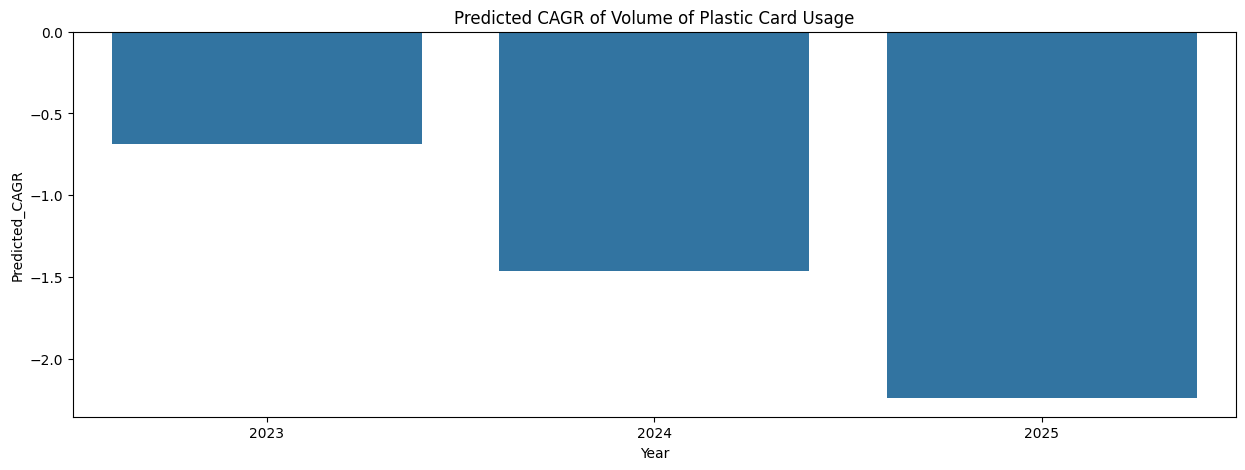

In [503]:
# Plot the Predicted CAGR
plt.figure(figsize=(15, 5))
sns.barplot(x='Year', y='Predicted_CAGR', data=df_pred)
plt.title('Predicted CAGR of Volume of Plastic Card Usage')
plt.show()

In [505]:
# Evaluate model performance by using Mean Squared Error (MSE) and r2 score
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (MSE) - Train: {mse_train:.4f}, Test: {mse_test:.4f}")
print(f"R-squared (R2) - Train: {r2_train:.4f}, Test: {r2_test:.4f}")



Mean Squared Error (MSE) - Train: 48.2988, Test: 75.8806
R-squared (R2) - Train: 0.1388, Test: -0.2114


Model Result; R2 Score value for the training set is very low (only 13.88%), and the R2 Score value for the test set is negative (-0.2114), indicating that the model is not able to capture the relationships in the data effectively for both datasets. The model and feature selection may need improvement to enhance prediction performance.